# 实战 图像风格转换
## 应用：
- 图像分类 
- 目标检测
- 图像生成(部分属于无监督学习)
    - 图像风格转换
    - 图像修复
    - 换脸
    - 图像超清化
    - 图像翻译
    - 文本生成图像
- 图像生成文本

## cnn学到了什么--**重点**
- 卷积神经网络每一层激活值输出都可以看成图像的 **抽象表示**
- 层级越高 特征抽象程度越高 提取到的特征越高级 越具体化
- 解释：
    - 每个激活值可以看成一个分类器输出
    - 众多分类器构成了一种抽象表示
    - 层级越深 变换程度越高 抽象程度越大 分类的内容越高级


## 图像风格转换V1
- 内容特征：cnn某一层的激活输出
    - 由于cnn具有图像抽象表示能力
- 风格特征：激活输出之间的关系 
    - 对于同一层 不同的kernel得到不同的channel 
    - 不同的channel之间的共性就是风格特征
    - 通过不同channel之间的(点积/内积)运算可以得到共性值 即为风格特征
 - 使用风格特征 内容特征 生成图像
     - 思想： 固定网络 
         - 使x输入 与内容图像 具有相近内容特征
         - 使x输入 与风格图像 具有相进风格特征
     - tips：
         - 风格特征在深层输出中(但不要太深) 表现明显
         - 内容特征在浅层输出中(1层很好)表现明显
             - 可以通过调节 两个loss权重之一为0 得到的x与相应图片的相似度 得到上述结论
             - 可以理解为浅层更容易提取内容特征 深层更容易提取输出共性的风格特征
         - 通常将多个层次的style loss 加权求和得到style total loss
         - content loss通常取单层
     - w1\*content_loss + w2\*style\*loss = loss
         - w1 w2 相差会较大 因为w2在计算中需要使用/大数字保证不溢出
         - content loss 只需要f_ij 取平方差和
         - style loss 通过计算gram矩阵(ch\*ch每一个元素都是两个通道相似度) 之后取平方差和
         
    - 优劣
        - 慢 
            - 每次都需要逐步求导生成一张图片(最大问题)
            - 对于不同的content style 都需要重新开始迭代优化生成
        - 逐步调整：可以得到多张效果
        - 调优目标：通过一次转换实现 而不是每次生成图像迭代优化

## 图像风格转换V2
- 基本架构
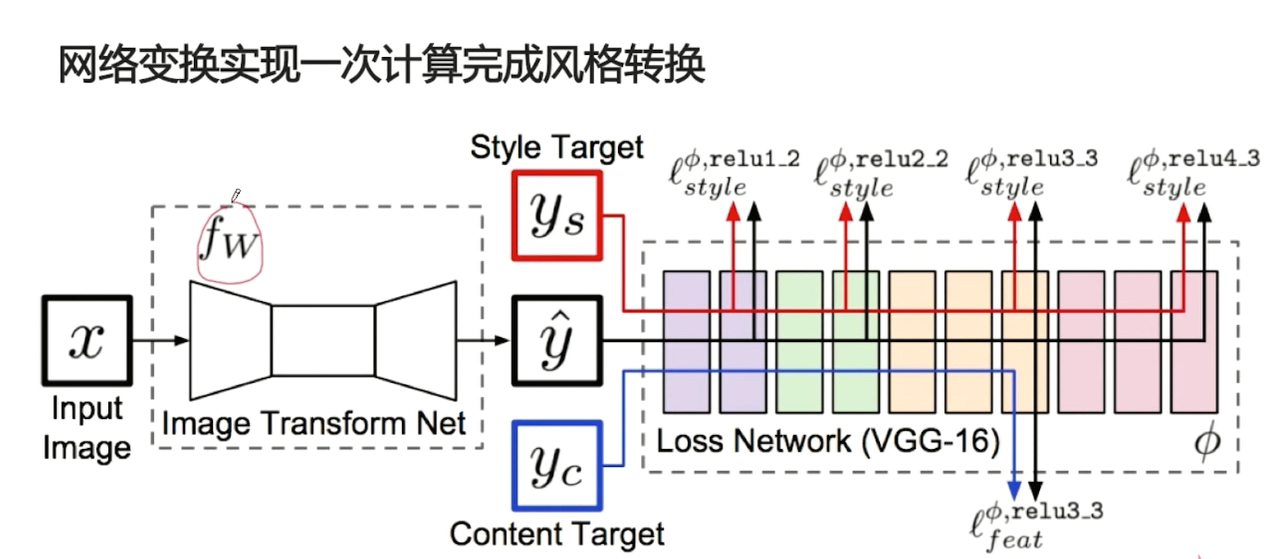
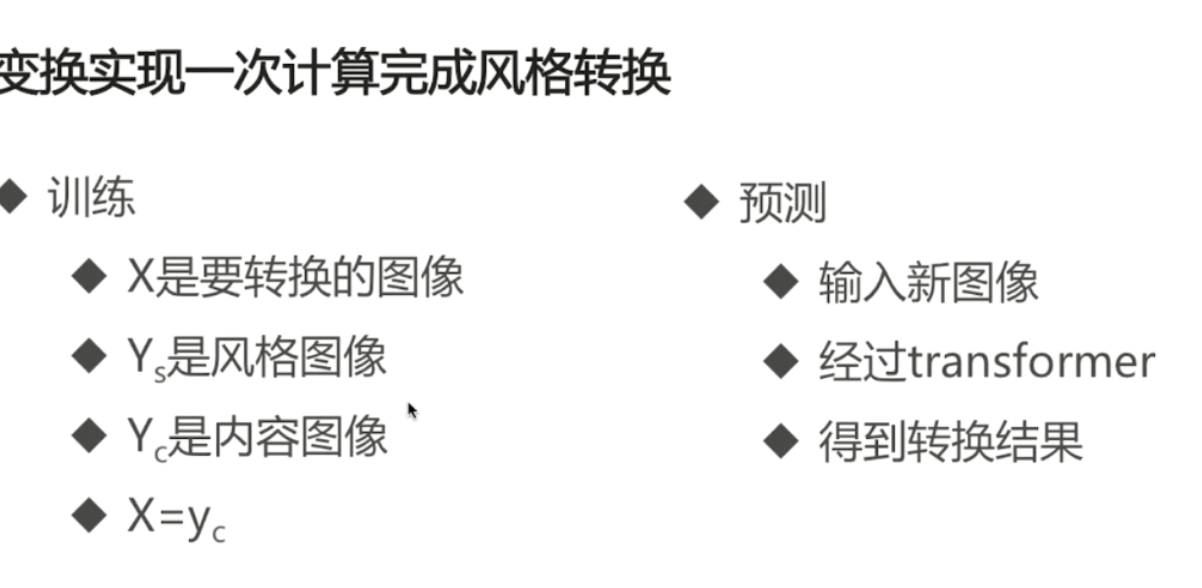
- 网络细节
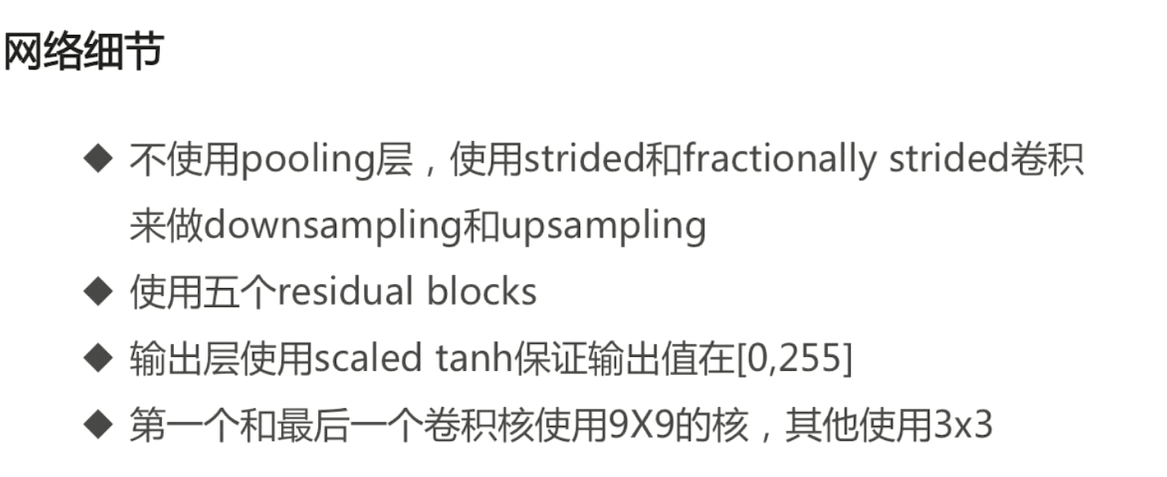
- 细节解释
    - 降采样 + 升采样
    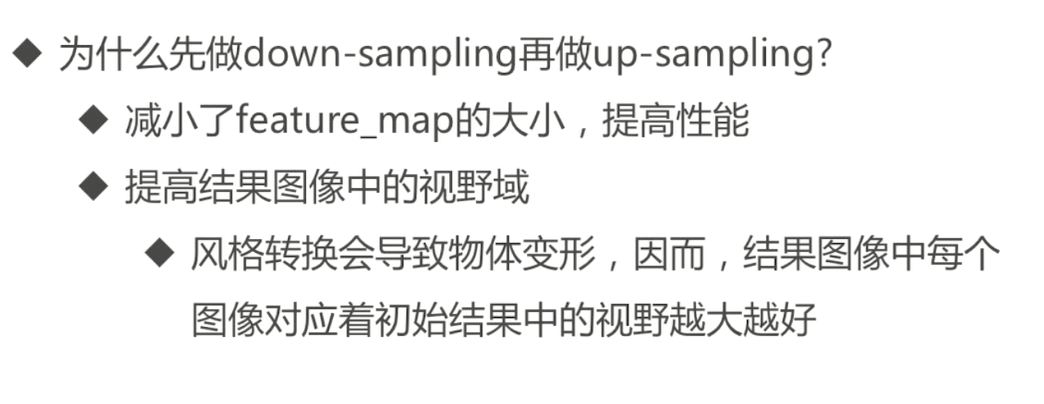
    - residual connection
    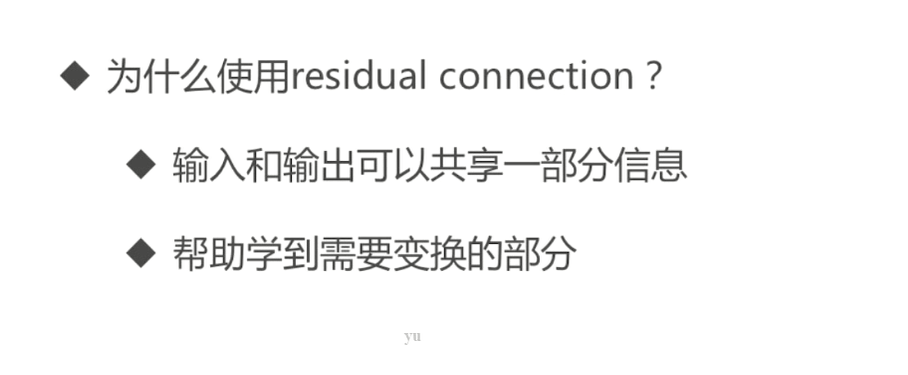
- 缺点 优点
    - 优点
        - 提升速度 只依赖于相同的style 对于不同的content 可以一次得到 不同style需要重新新联生成器
        - 训练结果是生成网络 不再是单一图像
        - 可以去掉style 并且将yc改为清晰图像(清晰版本x) 从而实现图像超清化应用
    - 缺点：
        - 与v1相同需要使用gram 作为style衡量 意义不明确 难以优化


## 图像风格转换V3
- 关键改进：改进了gram矩阵 通过稍微慢的计算 得到更细粒度的style相似度评估
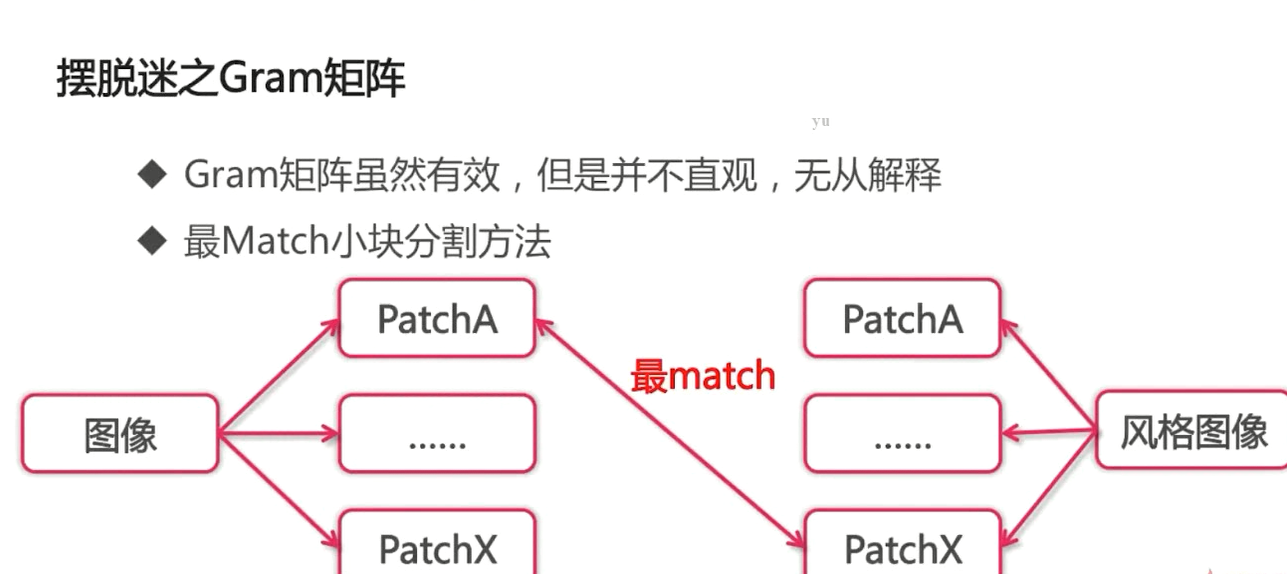
    - patch 是对于图像某一层次的输出的拆分 彼此之间可以有重叠 可以不重叠
    - 风格损失计算上：每一个patch与style中最相近的patch进行平方差和计算 每一个patch的损失和就是总的损失
    - 在内容损失计算上没有改变 仍然是平方差和
    - 仍然是采用v2的架构 但是loss改进了 更加精确 效果更好 速度稍慢于v2 快于v1
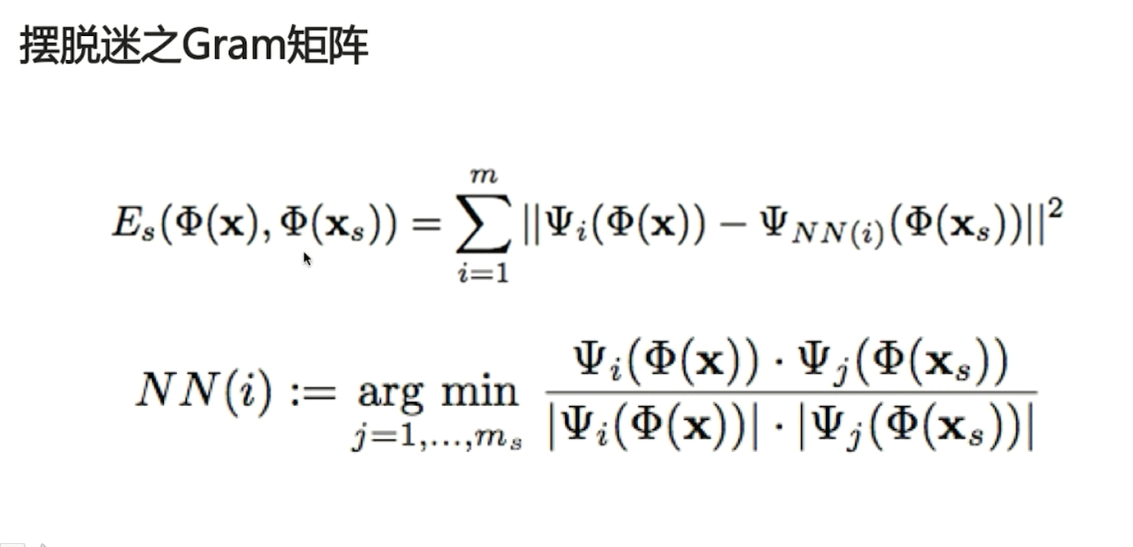


## 总对比
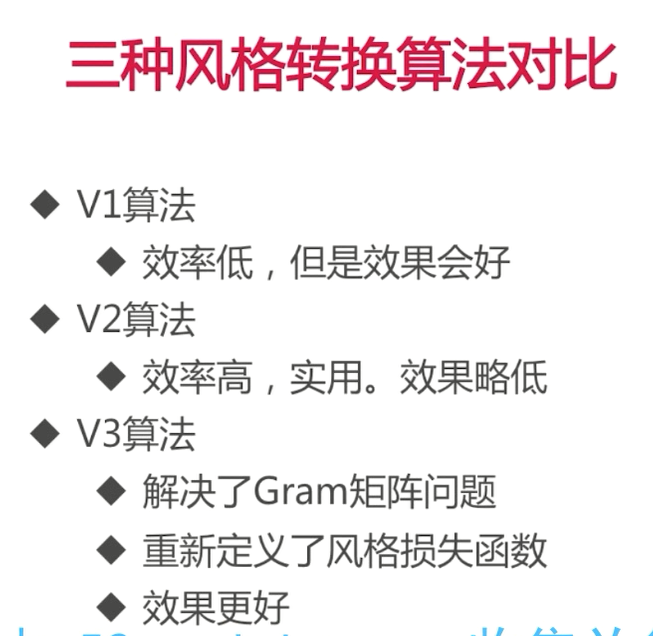

## 学到的内容总结
- cnn 可以提取到抽象特征表述(原图更抽象语义表述) -> 高层激活输出
- v1风格转换具体实现
- 训练生成器思想
- gram矩阵表示相似度得到style表示 + patch方法计算style相似度